In [15]:
using LsqFit

In [16]:
using Plots

In [17]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]

5-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0
 5.0

In [18]:
y = [2.0, 8, 26, 67, 100]

5-element Vector{Float64}:
   2.0
   8.0
  26.0
  67.0
 100.0

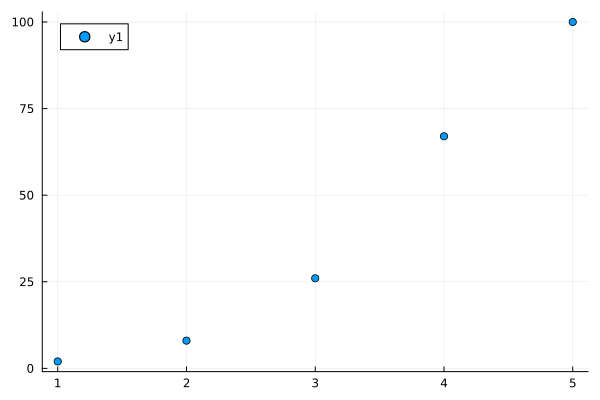

In [19]:
scatter(x, y)

## The Model

$$
y = \frac{S}{V + exp(-Bx)}
$$

In [20]:
function model(xdata, betas)
    S, V, B = betas
    return S ./ (V .+ exp.(-B * xdata))
end 

model (generic function with 1 method)

In [21]:
initialparams = [1.0, 1.0, 1.0]

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [22]:
result = LsqFit.curve_fit(model, x, y, initialparams)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}}([0.38059420662373594, 0.003256648641956435, 1.5027723963089574], [-0.31423222402882267, -0.7874627969932808, 0.664144567873894, -0.3234203520843124, 0.10054933202381733], [4.429304878075099 -7.466779438819549 1.66145109888711; 18.950727776310757 -136.68283091142857 13.534818506825113; … ; 175.1907372397437 -11681.132291413905 114.54111537635832; 263.0112271534079 -26327.635099813397 71.80454861180927], true, Float64[])

In [23]:
par = result.param

3-element Vector{Float64}:
 0.38059420662373594
 0.003256648641956435
 1.5027723963089574

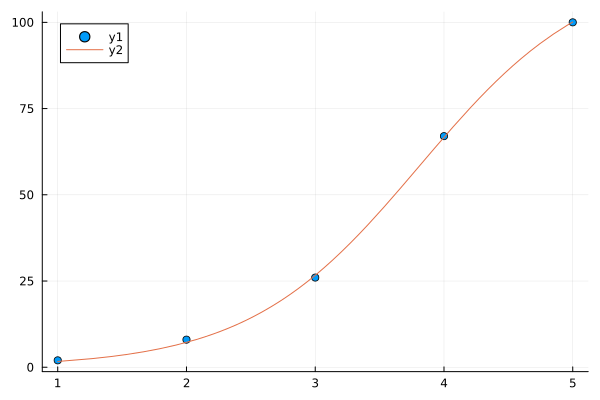

In [24]:
scatter(x, y)
Plots.plot!(a -> par[1] / (par[2] + exp(-par[3] * a)), minimum(x), maximum(x))

In [25]:
result.resid

5-element Vector{Float64}:
 -0.31423222402882267
 -0.7874627969932808
  0.664144567873894
 -0.3234203520843124
  0.10054933202381733

In [26]:
result.converged

true